In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import healpy as hp

import rubin_sim.maf as maf
import rubin_sim.utils as rsUtils
from rubin_sim.data import get_baseline


import glob

In [2]:
filenames = glob.glob('*mid1_const_season2*10yrs.db') + glob.glob("*noroll*.db")

out_dir = 'temp'
results_db = maf.db.ResultsDb(out_dir=out_dir)


In [4]:

fn = filenames[0]
run_name = fn.replace('_10yrs.db', '')
bundle_list = []


metric = maf.AccumulateCountMetric(bins=np.arange(0,365.25*11, 365.25))
sql = 'visitexposuretime > 20 and note not like "%%DD%%"'
slicer = maf.slicers.HealpixSlicer()

bundle_list.append(maf.MetricBundle(metric, slicer, sql, run_name=run_name,
                                       plot_funcs=[maf.HealpixSkyMap()]))

    
    
bd = maf.metricBundles.make_bundles_dict_from_list(bundle_list)
bg = maf.metricBundles.MetricBundleGroup(bd, fn, out_dir=out_dir, results_db=results_db)
bg.run_all()


Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


In [5]:
bundle_list[0].metric_values.shape

(196608, 10)

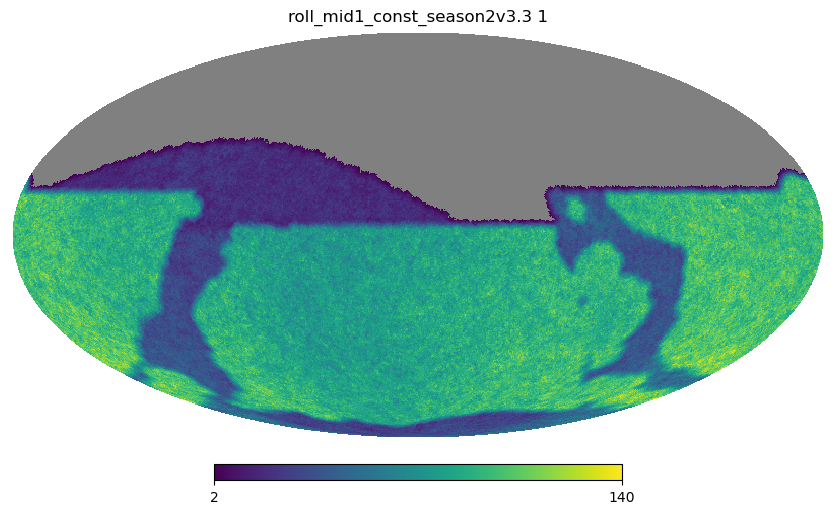

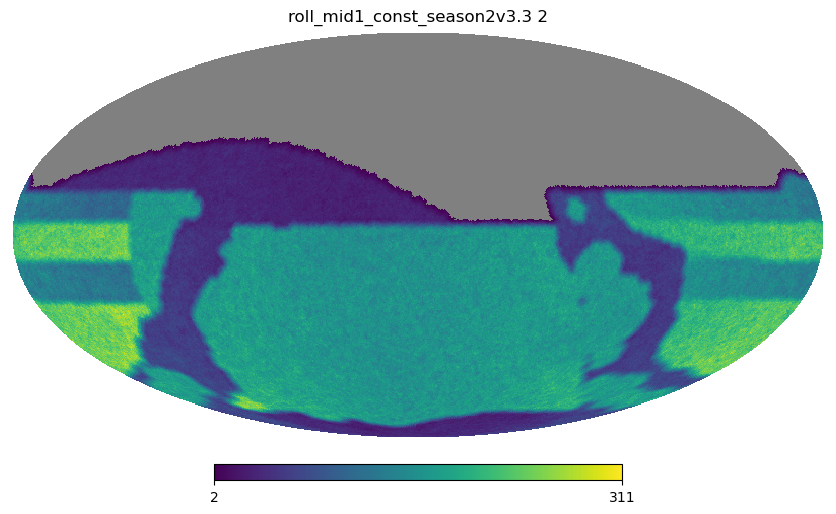

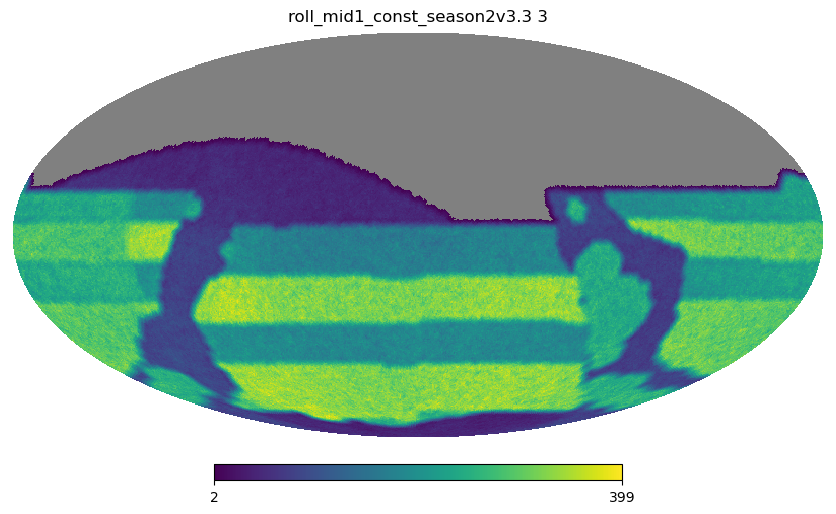

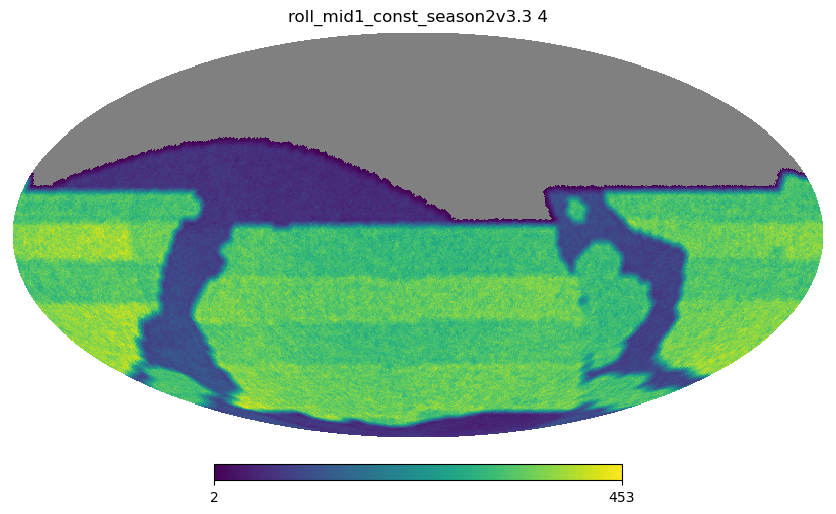

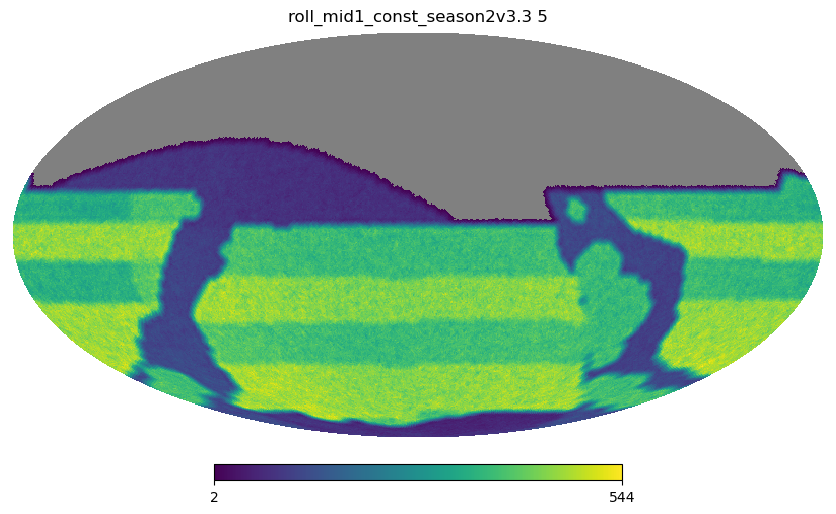

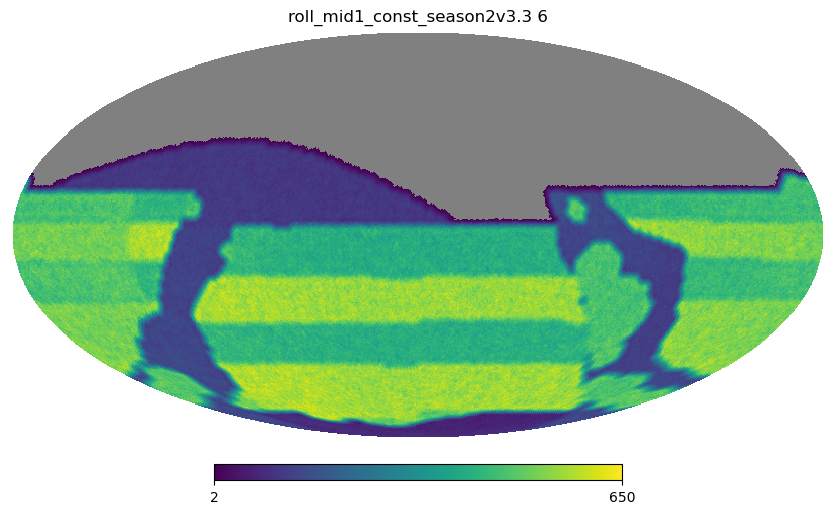

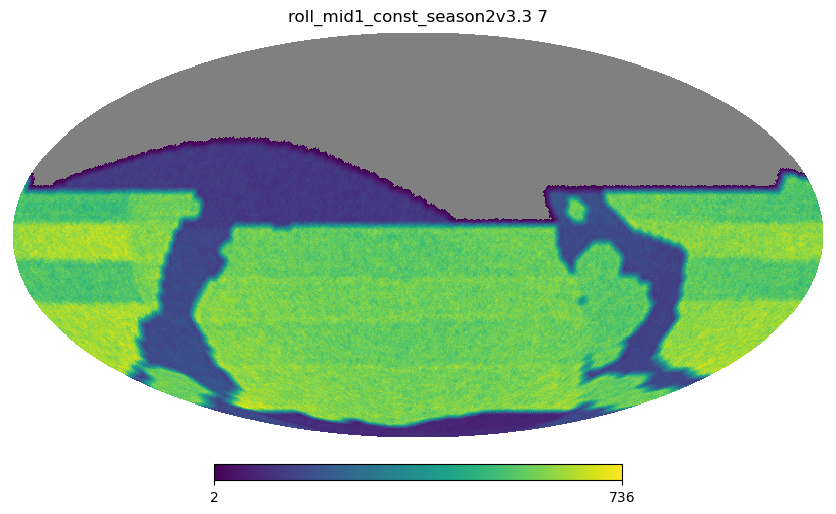

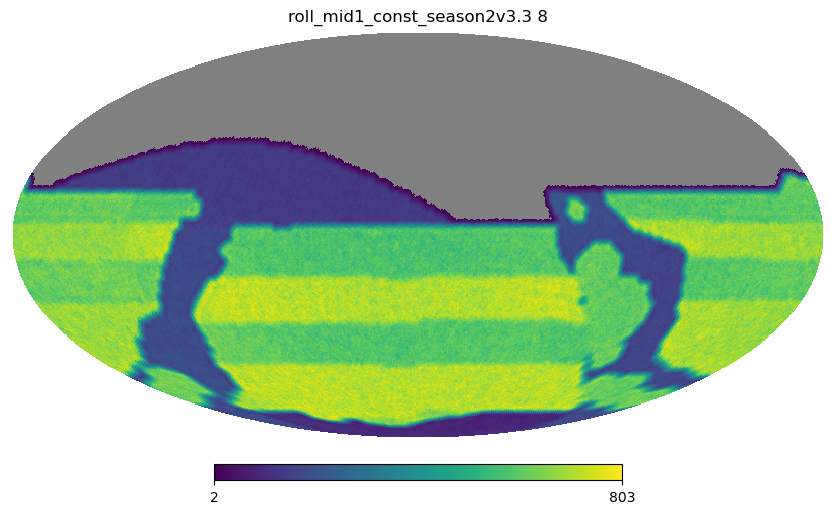

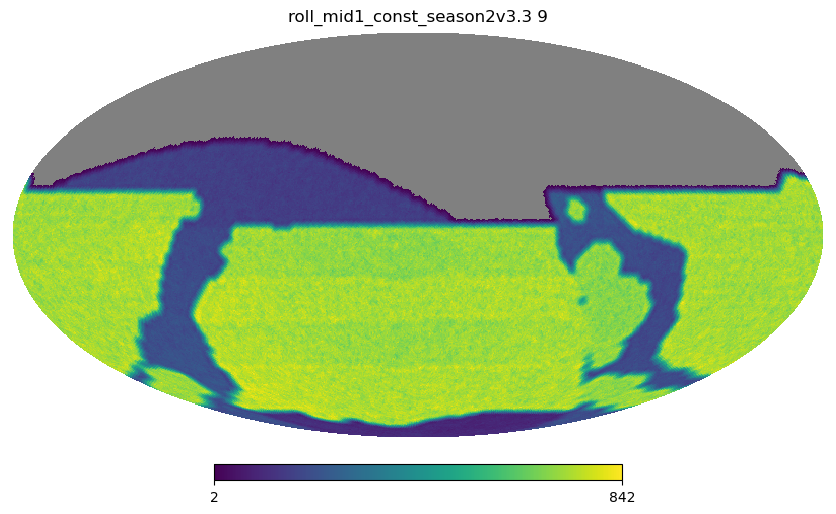

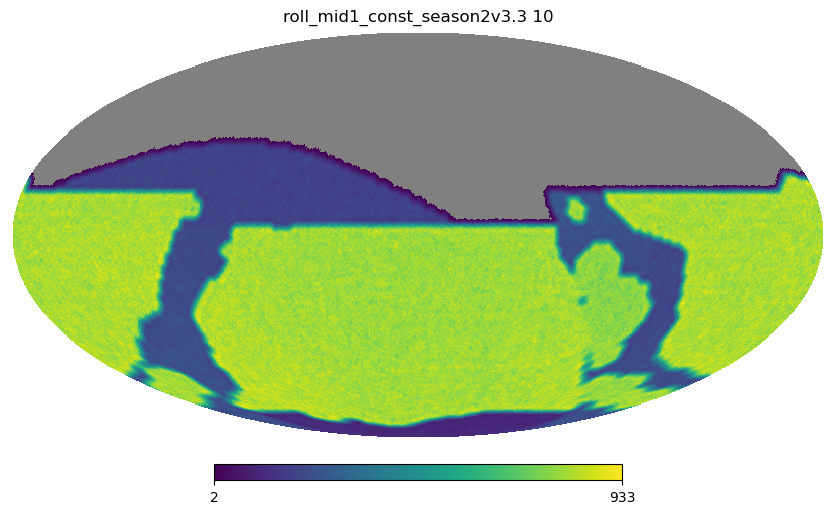

In [6]:
for i in range(bundle_list[0].metric_values.shape[-1]):

    hp.mollview(bundle_list[0].metric_values[:,i], title=run_name + ' %i' % (i+1))